## Importing the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Loading the data set


In [ ]:
data_set = pd.read_csv('./archive/spam.csv', encoding='latin-1')
data_set.head()

## Data modification and Data preprocessing

In [ ]:
data_set.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) #removing unnecessary columns
data_set.columns=['label','message']# renaming the columns for convinience
data_set.isnull().sum()# checking for missing values
data_set['label'] = data_set['label'].map({'ham': 0, 'spam': 1}) #encoding the labels as 0 for ham and 1 for spam
data_set.head()#displaying the first few rows of the cleaned data set

## visualizing the distribution of ham and spam messages

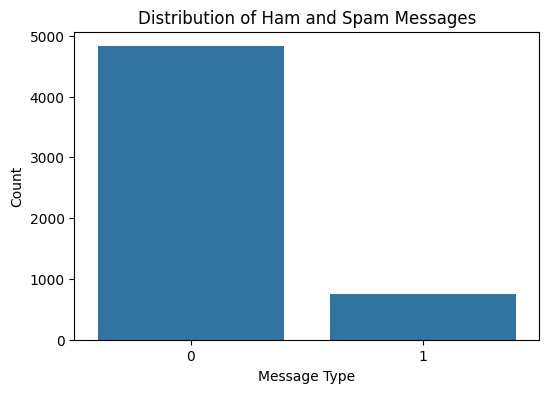

In [34]:
# Distribution of Ham and Spam messages
plt.figure(figsize=(6, 4))
sns.countplot(data=data_set, x='label')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

## vectorizing the text using TF-IDF

In [24]:
tf_idf = TfidfVectorizer(max_features=3000)
X = tf_idf.fit_transform(data_set['message']).toarray()
y = data_set['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the Model and training

In [25]:

model = MultinomialNB()


model.fit(X_train, y_train)


MultinomialNB()

## Evaluating the Model


In [26]:

y_pred = model.predict(X_test) 


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9757847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115


Confusion Matrix:
 [[965   0]
 [ 27 123]]


## visualizing the confusion matrix

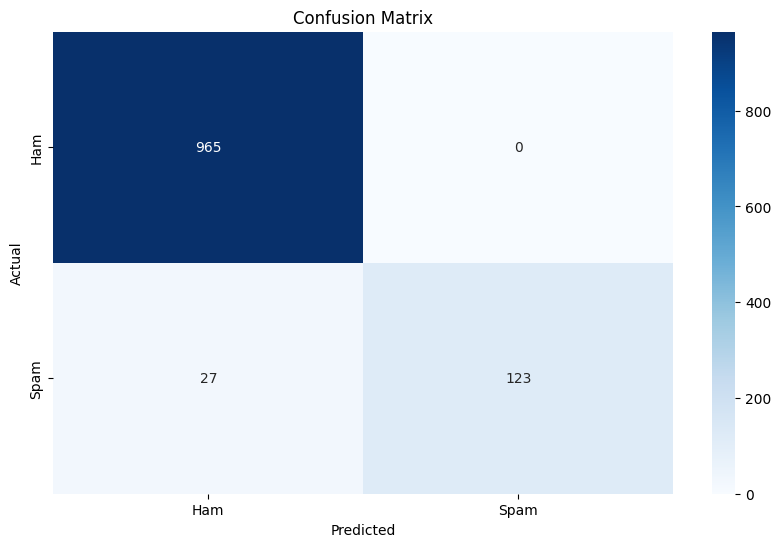

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## plotting the ROC curve

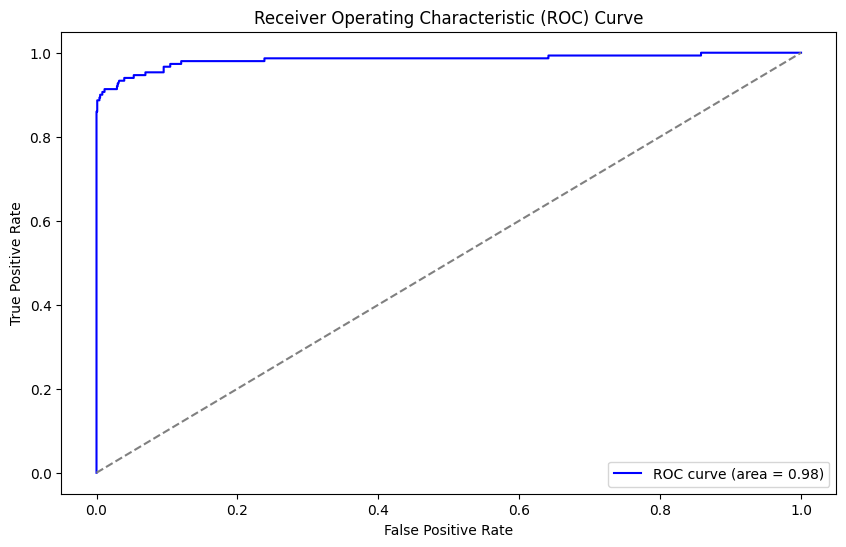

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## plotting the Precision Recall Curve

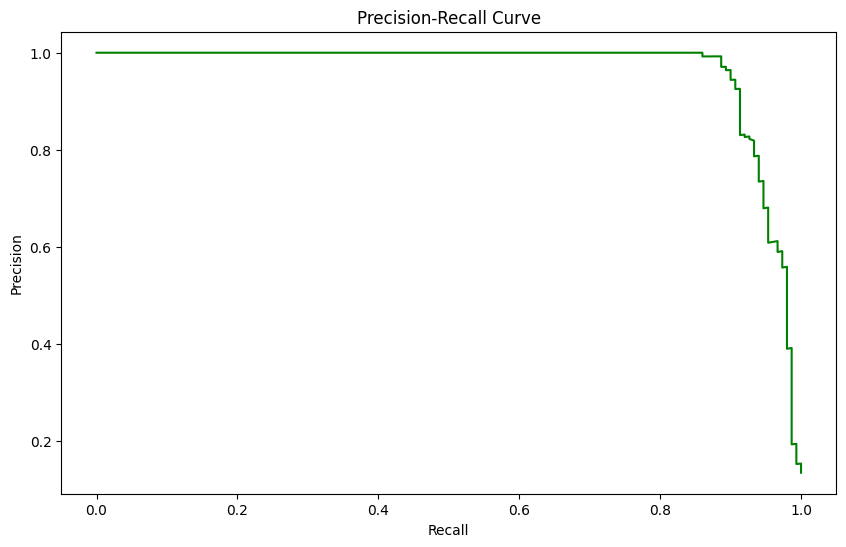

In [37]:
from sklearn.metrics import precision_recall_curve

# Compute the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Saving the model

In [38]:
import joblib

# Save the model
joblib.dump(model, 'spam_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tf_idf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

## Loading the model for testing


In [39]:
model = joblib.load('spam_classifier_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

## function to predict if message is spam or not spam

In [40]:
def predict_message(message):
    transformed_message = tfidf.transform([message])
    prediction = model.predict(transformed_message)
    return 'spam' if prediction[0] == 1 else 'not spam'

## testing with a sample

In [41]:
test_message = "Congratulations sir you won a prize in machine learning"
print(f"Message: {test_message}")
print(f"Prediction: {predict_message(test_message)}")

Message: Congratulations sir you won a prize in machine learning
Prediction: spam
